In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import datetime
import numpy as np
import netCDF4 as nc
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt, dates
import seaborn as sns 
import pandas as pd
import os
import warnings
import h5py
import scipy.io
import seaborn as sns
import rasterio
import rasterio.features
import rasterio.warp
from matplotlib import cm
from scipy.io import savemat
from numpy import savetxt
warnings.filterwarnings('ignore')

# Extract MAR

In [4]:
MAR_dir = '/content/drive/MyDrive/data science greenland albedo project/MAR/'
mat = scipy.io.loadmat('/content/drive/MyDrive/data science greenland albedo project/sboth_6km.mat')
sboth_6km = mat['sboth_6km']
sboth_6km = np.flip(sboth_6km, axis=0)
sboth_6km.shape

(415, 230, 22, 92)

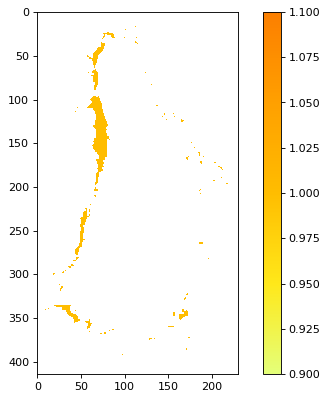

In [ ]:
avg_sboth = np.nanmean(np.nanmean(sboth_6km, axis=2), axis=2)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(avg_sboth, cmap=cm.Wistia)
plt.colorbar()
plt.show()

In [5]:
MAR_file_name = 'MARv3.12-6_5km-daily-ERA5-2020.nc'
MAR_file = MAR_dir + MAR_file_name
MAR_DS = nc.Dataset(MAR_file)
data = MAR_DS['AL2']

In [6]:
data.shape

(366, 1, 415, 230)

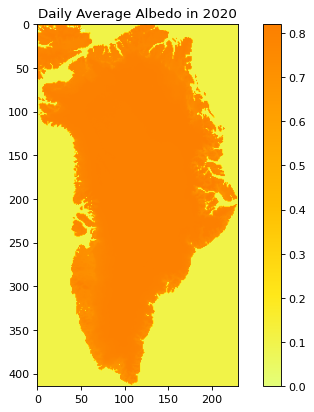

In [16]:
avg_al2 = np.mean(np.mean(data, axis=1), axis=0)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.flip(avg_al2, axis=0), cmap=cm.Wistia)
plt.colorbar()
plt.title("Daily Average Albedo in 2020")
plt.show()

In [7]:
sboth_6km = np.transpose(sboth_6km, (3, 0, 1, 2))
sboth_6km_2020 = sboth_6km[:, :, :, 20]
sboth_6km_2020.shape

(92, 415, 230)

In [8]:
june1 = date.toordinal(date(2020,6,1))-date.toordinal(date(2020,1,1))+1
aug31 = date.toordinal(date(2020,8,31))-date.toordinal(date(2020,1,1))+1
data_678 = data[june1-1:aug31,0,:,:]
print(data_678.shape)

(92, 415, 230)


In [9]:
sboth_data = sboth_6km_2020 * data_678

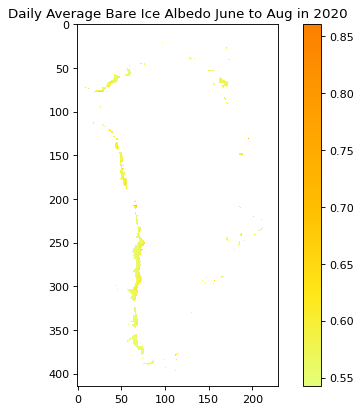

In [12]:
avg_al2 = np.nanmean(sboth_data, axis=0)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.flipud(avg_al2), cmap=cm.Wistia)
plt.colorbar()
plt.title("Daily Average Bare Ice Albedo June to Aug in 2020")
plt.show()

In [ ]:
for var in ['LWD', 'LWU', 'SWD', 'SF', 'RF', 'SHF', 'LHF', 'SP', 'CD', 'CM']:
  print(var)
  res = []
  for y in range(22):
    year = 2000 + y
    print(year)
    MAR_file_name = 'MARv3.12-6_5km-daily-ERA5-'+str(year)+'.nc'
    MAR_file = MAR_dir + MAR_file_name
    MAR_DS = nc.Dataset(MAR_file)
    data = MAR_DS[var]
    june1 = date.toordinal(date(year,6,1))-date.toordinal(date(year,1,1))+1
    aug31 = date.toordinal(date(year,8,31))-date.toordinal(date(year,1,1))+1
    data_678 = data[june1-1:aug31,:,:]
    for d in range(92):
      for i in range(415):
        for j in range(230):
          if sboth_6km[i, j, y, d] == 1:
            res.append(data_678[d, i, j])
    # print('done')
  file_name = '/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/' + var + '.csv'
  savetxt(file_name, res, delimiter=',')

LWD
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
LWU
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
SWD
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
SF
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
RF
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
SHF
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
LHF
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
SP
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
CD
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
201

In [ ]:
# len(res)

1369681

In [ ]:
# AL2 = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/AL2.csv').values

# Extract MODIS

In [ ]:
with rasterio.open('/content/drive/MyDrive/data science greenland albedo project/MOD10A1_albedo_MARproj_6_5km/20000601_albedo.tif') as src:
  array = src.read(1)
  print(array.shape)

(415, 230)


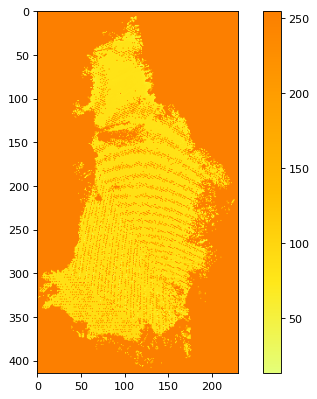

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.flip(array, axis=0), cmap=cm.Wistia)
plt.colorbar()
plt.show()

In [ ]:
# MODIS_files

MODIS_albedo_dir = '/content/drive/MyDrive/data science greenland albedo project/MOD10A1_albedo_MARproj_6_5km/'

def date_clean(t, day):

  if t == 1:
    if day == (151+12) or day == (151+27) or (151+67) <= day <= (151+79):
      return True 
    else:
      return day

  elif t == 2:
    if day == (151+15) or (151+16) <= day <= (151+32): 
      return True
    else:
      return day

  elif t == 4:
    if day == (151+18) or day == (151+59) or day == (151+61) or day == (151+67):
      return True
    else:
      return day

  elif t == 7:
    if day == (151+20) or day == (151+21) or day == (151+84):
      return True
    else:
      return day
        
  elif t == 10 and day == (151+87):
    return True
        
  elif t == 11 and day == (151+72):
    return True
        
  elif t == 13 and day == (151+6):
    return True

  else:
    return day


# albedo_tensor = np.zeros([415, 230, 22, 92])
albedo = []

for t in range(1,23,1):

  yearmat = t + 1999
  june1 = date.toordinal(date(yearmat,6,1))-date.toordinal(date(yearmat,1,1))
  aug31 = date.toordinal(date(yearmat,8,31))-date.toordinal(date(yearmat,1,1))
  year1 = t - 1

  print(yearmat)

  if year1 < 10:
    MODIS_albedo_file_year = '200' + str(year1)
  else:
    MODIS_albedo_file_year = '20' + str(year1)

  d = 0
  for day in range(june1, aug31+1, 1):

    # print(d)

    if date_clean(t, day) == True:
      for i in range(415):
        for j in range(230):
          if sboth_6km[i, j, year1, d] == 1:
            albedo.append(np.NaN)

      d += 1
      continue
    else:
      cday = date_clean(t, day)

      daymat = str(date.fromordinal(cday+date.toordinal(date(yearmat,1,1))))
      month_day = daymat.split("-")[1] + daymat.split("-")[2]

      MODIS_albedo_file_monthday = month_day + '_albedo.tif'
      MODIS_albedo_file = MODIS_albedo_dir + MODIS_albedo_file_year + MODIS_albedo_file_monthday

      with rasterio.open(MODIS_albedo_file) as albedo_src:
        albedo_array = albedo_src.read(1)
      
      albedo_array = np.flip(albedo_array, axis=0)
      
      albedo_array[albedo_array < 0] = np.NaN
      albedo_array[albedo_array > 100] = np.NaN

      for i in range(415):
        for j in range(230):
          if sboth_6km[i, j, year1, d] == 1:
            albedo.append(albedo_array[i, j])

      d += 1

    # albedo_tensor[:,:,t-1,day-152] = albedo_array

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [ ]:
len(albedo)

1369681

In [ ]:
savetxt('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/albedo.csv', albedo, delimiter=',')

# Export data

In [ ]:
LWD = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/LWD.csv').values
LWU = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/LWU.csv').values
ST2 = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/ST2.csv').values
ME = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/ME.csv').values
SWD = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/SWD.csv').values
RF = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/RF.csv').values
SF = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/SF.csv').values
SHF = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/SHF.csv').values
LHF = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/LHF.csv').values
SP = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/SP.csv').values
CD = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/CD.csv').values
CM = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/CM.csv').values
TT = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/TT.csv').values
QQ = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/QQ.csv').values
UU = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/UU.csv').values
VV = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/VV.csv').values
AL2 = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/AL2.csv').values
albedo = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_v_flatten2/albedo.csv').values

In [ ]:
LWN = LWD - LWU

In [ ]:
columns = ["LWN", "ST2", "ME", "SWD", "RF", "SF", "SHF", "LHF", "SP", "CD", "CM", "TT", "QQ", "UU", "VV", "AL2", "albedo"]
arrays = np.concatenate((LWN, ST2, ME, SWD, RF, SF, SHF, LHF, SP, CD, CM, TT, QQ, UU, VV, AL2, albedo), axis=1)

In [ ]:
df = pd.DataFrame(arrays, columns = columns)
df.head()

,LWN,ST2,ME,SWD,RF,SF,SHF,LHF,SP,CD,CM,TT,QQ,UU,VV,AL2,albedo
0,-72.722000,-1.441925,31.091021,321.971558,1.477201e-03,0.000000e+00,28.755768,-18.186138,958.125793,0.000217,0.012455,4.917992,3.189087,-1.309971,2.412317,0.551128,47.0
1,-75.489471,-1.726056,20.917885,338.063568,6.715262e-05,3.687320e-07,55.636593,-52.156727,988.829651,0.066936,0.091493,0.983965,2.729851,3.445704,0.570313,0.556938,56.0
2,-28.299072,-3.013611,-0.000000,152.537247,5.159156e-05,2.155155e+00,-0.950678,-52.996662,957.029785,0.918136,0.742793,-2.290780,2.527486,-4.836516,-5.375922,0.621309,75.0
3,-33.994049,-1.813703,4.366425,232.480637,6.445825e-07,2.404408e-01,-6.710862,-38.557491,932.894592,0.689475,1.000000,-1.609589,2.116926,-0.203870,-2.054283,0.601768,46.0
4,-41.142273,-2.935536,-0.000000,238.158371,1.137988e-06,2.512345e-01,-24.023888,-24.586668,932.433533,0.681241,1.000000,-1.458742,2.058762,-1.058693,-1.459658,0.859345,43.0


In [ ]:
df2 = df[~np.isnan(df["albedo"])]

In [ ]:
np.count_nonzero(np.isnan(df2))

0

In [ ]:
df2.shape

(1356346, 17)

In [ ]:
df2.to_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_df_updated.csv', index=False)

In [ ]:
albedo_df = pd.read_csv('/content/drive/MyDrive/data science greenland albedo project/albedo_df_updated.csv')
albedo_df

,LWN,ST2,ME,SWD,RF,SF,SHF,LHF,SP,CD,CM,TT,QQ,UU,VV,AL2,albedo
0,-72.722000,-1.441925,31.091021,321.971558,1.477201e-03,0.000000e+00,28.755768,-18.186138,958.125793,0.000217,0.012455,4.917992,3.189087,-1.309971,2.412317,0.551128,47.0
1,-75.489471,-1.726056,20.917885,338.063568,6.715262e-05,3.687320e-07,55.636593,-52.156727,988.829651,0.066936,0.091493,0.983965,2.729851,3.445704,0.570313,0.556938,56.0
2,-28.299072,-3.013611,-0.000000,152.537247,5.159156e-05,2.155155e+00,-0.950678,-52.996662,957.029785,0.918136,0.742793,-2.290780,2.527486,-4.836516,-5.375922,0.621309,75.0
3,-33.994049,-1.813703,4.366425,232.480637,6.445825e-07,2.404408e-01,-6.710862,-38.557491,932.894592,0.689475,1.000000,-1.609589,2.116926,-0.203870,-2.054283,0.601768,46.0
4,-41.142273,-2.935536,-0.000000,238.158371,1.137988e-06,2.512345e-01,-24.023888,-24.586668,932.433533,0.681241,1.000000,-1.458742,2.058762,-1.058693,-1.459658,0.859345,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356341,-43.275085,-1.236554,1.398581,74.758446,3.044935e-02,0.000000e+00,62.854477,-32.733028,992.930115,0.324667,0.421644,1.224079,3.030767,-1.394487,4.092629,0.560410,59.0
1356342,-47.483337,-1.794702,0.000683,76.475739,2.731092e-01,5.483725e-09,46.096157,-27.336418,975.720886,0.289549,0.404225,0.466370,2.939888,-0.906700,4.478564,0.561800,39.0
1356343,-50.855911,-2.919361,-0.000000,77.469734,0.000000e+00,0.000000e+00,11.102441,-4.608173,986.646790,0.000083,0.285705,-0.306081,2.761607,-1.194205,-1.120619,0.560721,56.0
1356344,-55.426559,-2.191944,0.118521,98.399437,1.164153e-07,2.124580e-06,26.461775,-9.899311,1004.978210,0.000333,0.005274,-0.295164,2.954411,2.072666,-0.774044,0.560147,67.0


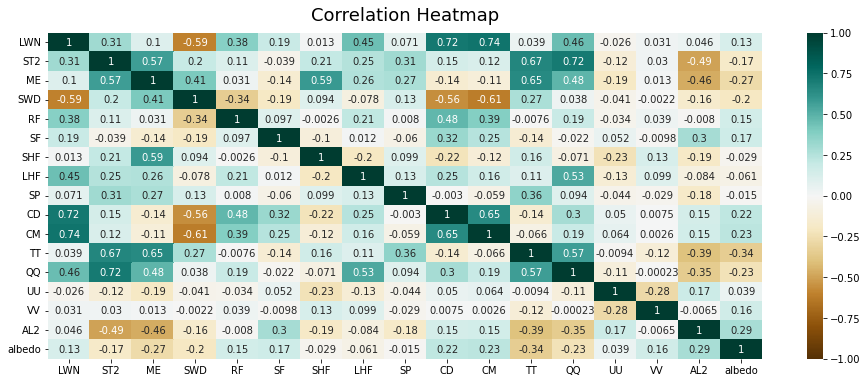

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(albedo_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

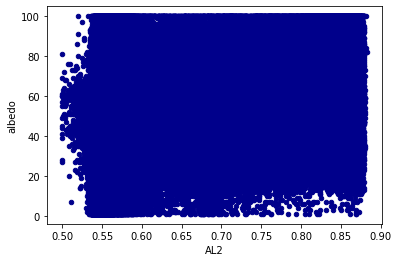

In [ ]:
albedo_df.plot.scatter(x='AL2', y='albedo', c='DarkBlue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7932c77950>]],
      dtype=object)

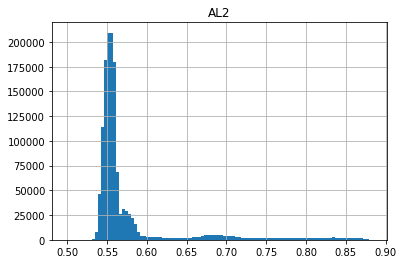

In [ ]:
albedo_df.hist(column='AL2', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7931e8c550>]],
      dtype=object)

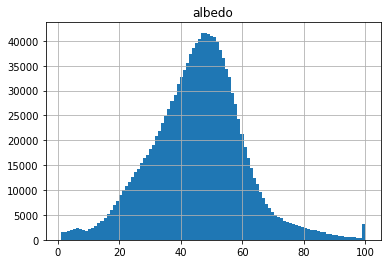

In [ ]:
albedo_df.hist(column='albedo', bins=100)